In [1]:
import sys
sys.path.append("/Users/anuram/Documents/Documents/hydrogenase-ftir/src")
sys.path.append("/Users/anuram/Documents/Documents/hydrogenase-ftir/notebooks/anu_winter_2024")
#sys.path.append("/Users/anuram/Documents/Documents/hydrogenase-ftir/src/hydrogenase_processing")

In [11]:
%load_ext autoreload
%autoreload 2

#Setting Up and Importing the Necessary Packages/Libraries
##Package for reading in Bruker OPUS type files
from brukeropusreader import read_file
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pathlib

#Local Functions
from hydrogenase_processing.cut_range import cut_range_subtract_prospecpy_objects
from hydrogenase_processing.second_deriv import  second_deriv_prospecpy_objects
from hydrogenase_processing.anchor_points import interact
from hydrogenase_processing.anchor_points import get_peaks_absorbance, get_peak_wid_at_half_height
from hydrogenase_processing.baseline import baseline_spline, baseline_correction, get_baseline_peak_index
from hydrogenase_processing.peak_fit import peak_fit
from hydrogenase_processing.io import import_run_data
from hydrogenase_processing.interact import interact


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing spectra data and water vapor data

In [31]:
#Paths to Local Data
path_to_water_vapor_data = pathlib.Path("../../data/opus_files/water_vapor")
path_to_output_plots_= pathlib.Path("../../data/output_plots/")
path_to_pD6_data = pathlib.Path("../../data/opus_files/pD6")

In [33]:
pD6_raw_data = import_run_data(path_to_pD6_data, input_type="raw spectra", output_folder = '/Users/anuram/Documents/output_ftir3_test_21072024')
wv_data = import_run_data(path_to_water_vapor_data)

# Subtracting water vapor from raw spectra

In [34]:
#Initializing dict of post water vapor subtraction spectra
cut_range_subtract_prospecpy_objects(pD6_raw_data, wv_data, range_start = 2150, range_end = 1850, showplots=False)
#pD6_raw_data[].cut_subtracted_data

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0000/cut_range_subtracted_spectra
Atmospheric fit parameters saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0000/cut_atmfitparameters.csv
Cut subtracted data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0000/cut_subtracted_data.csv
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0001/cut_range_subtracted_spectra
Atmospheric fit parameters saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0001/cut_atmfitparameters.csv
Cut subtracted data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0001/cut_subtracted_data.csv
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0002/cut_range_subtracted_spectra
Atmospheric fit parameters saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0002/cut_atmfitparameters.cs

In [37]:
interact(pD6_raw_data,0.4,1.8)

ToggleButtons(description='Step 1. File selection:', options=('Hyd1 pD6 ACT.0000', 'Hyd1 pD6 ACT.0001', 'Hyd1 …

Output()

BoundedFloatText(value=0.4, description='Threshold for peak selection(0 to 1 in 0.01 steps):', layout=Layout(w…

BoundedFloatText(value=1.8, description='adj for anchor point selection(0 to 5 in 0.01 steps):', layout=Layout…

Button(description='Save', style=ButtonStyle())

Button(description='Undo', style=ButtonStyle())

In [28]:
pD6_raw_data[0].peak_index

(array([274, 507, 776, 846, 886, 959]),
 {'prominences': array([8.92975589e-05, 4.49144076e-05, 1.21458999e-04, 8.07680185e-05,
         5.99970249e-05, 3.52888302e-05]),
  'left_bases': array([147, 419, 727, 818, 866, 935]),
  'right_bases': array([727, 727, 818, 866, 935, 980])})

In [29]:
print(pD6_raw_data[0].peak_fit(threshold = 0.4))

(array([274, 507, 776, 846, 886, 959]), [2066.798142785838, 1996.675148442532, 1915.717700037599, 1894.6507060288802, 1882.612423738184, 1860.642558557663], [-6.668362852598607e-05, -3.480837210734032e-05, -8.714984394630032e-05, -5.606560595942864e-05, -3.6833231487807206e-05, -3.054155489139058e-05])


## Get the second derivatives

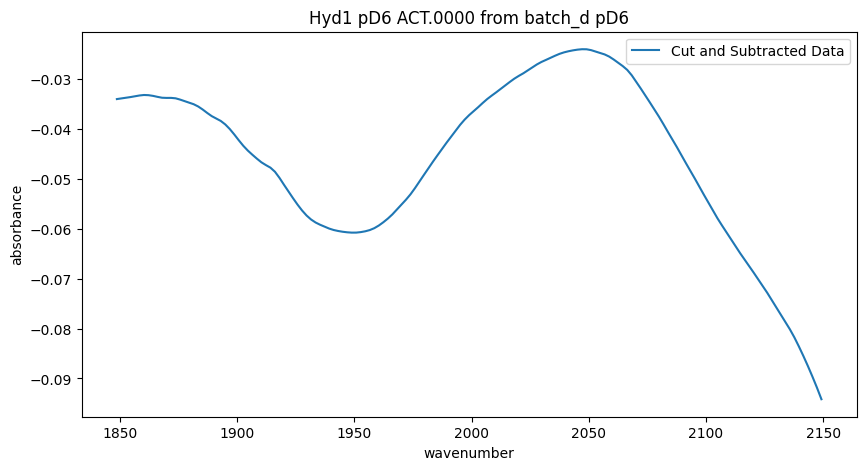

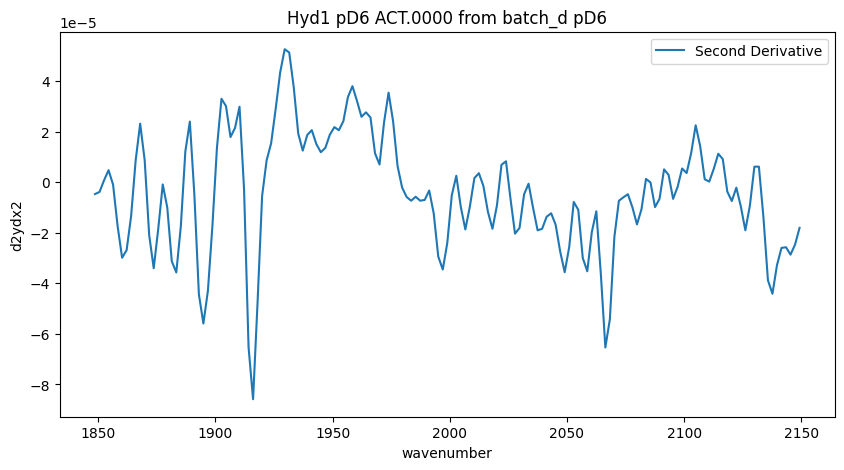

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0000/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0000/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0000/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0000/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0000/second_derivative_data.csv


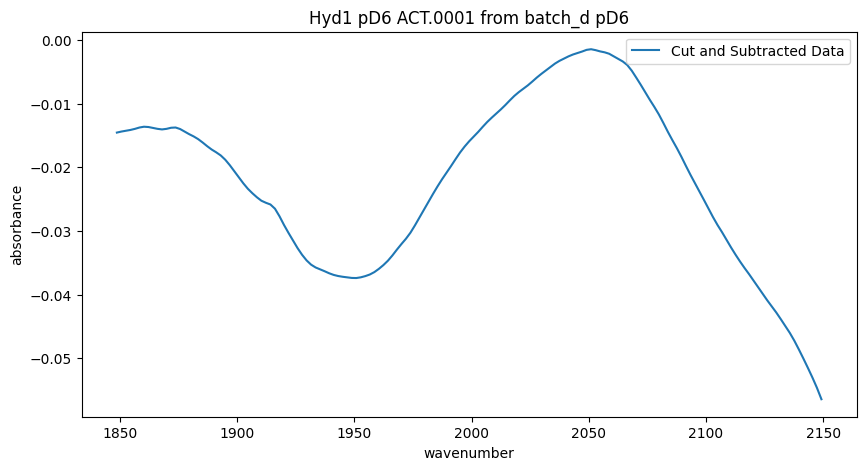

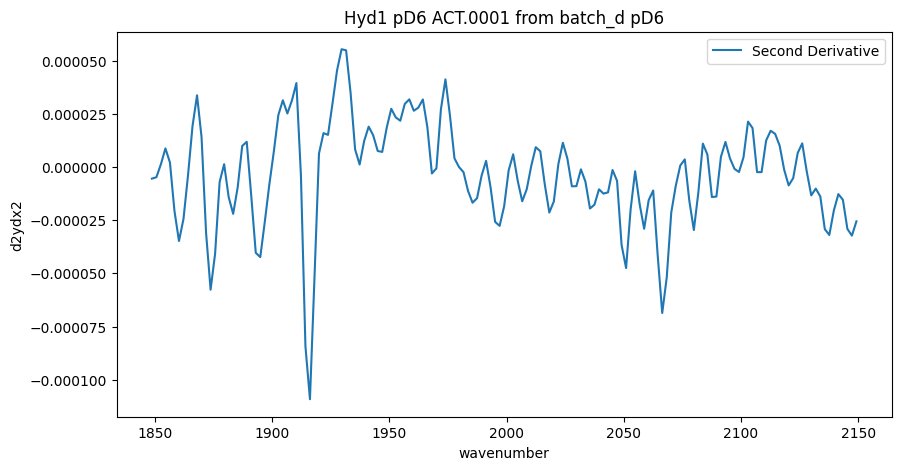

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0001/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0001/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0001/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0001/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0001/second_derivative_data.csv


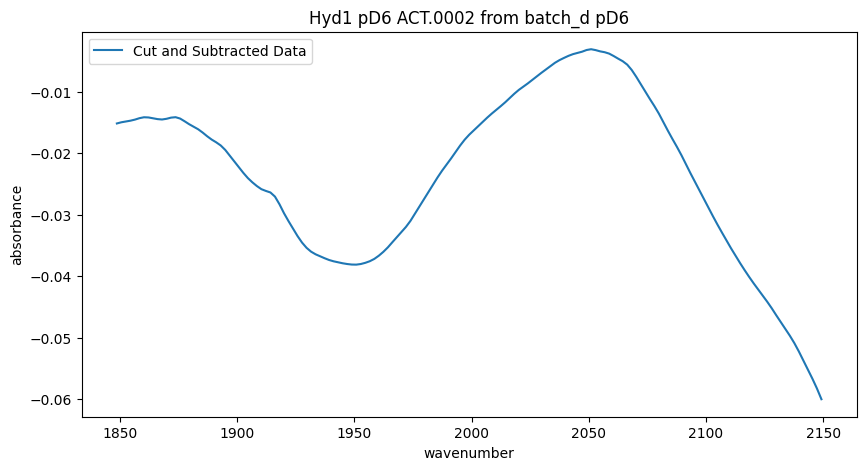

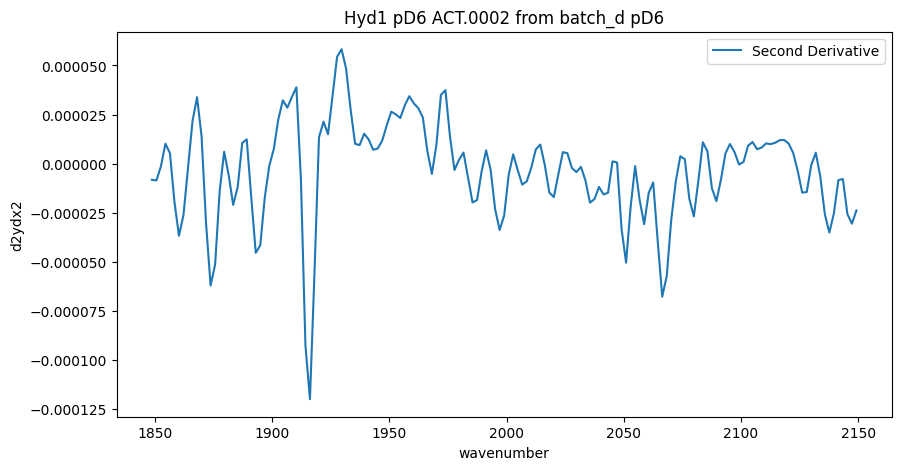

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0002/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0002/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0002/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0002/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0002/second_derivative_data.csv


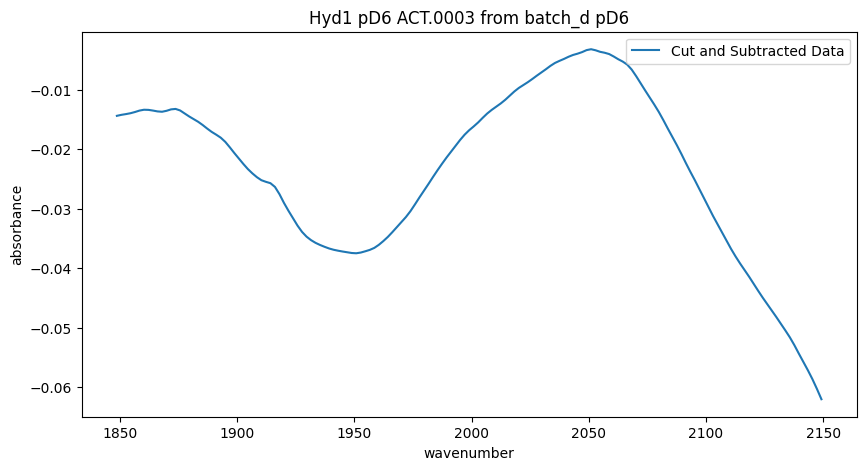

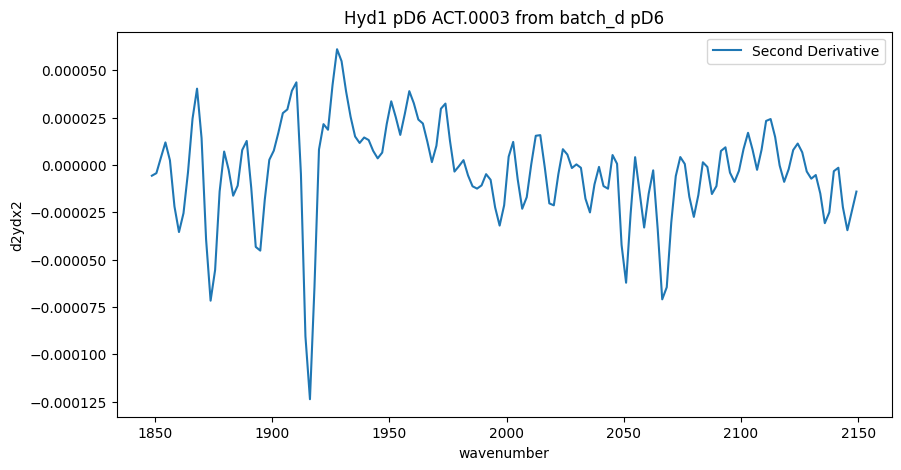

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0003/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0003/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0003/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0003/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0003/second_derivative_data.csv


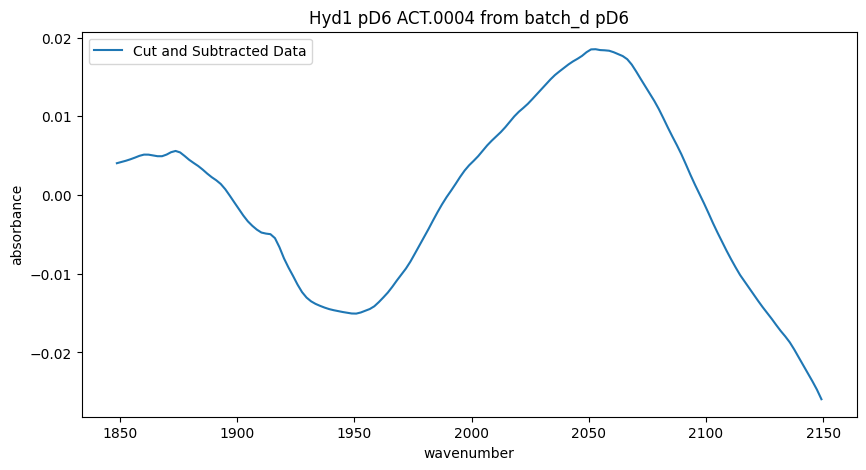

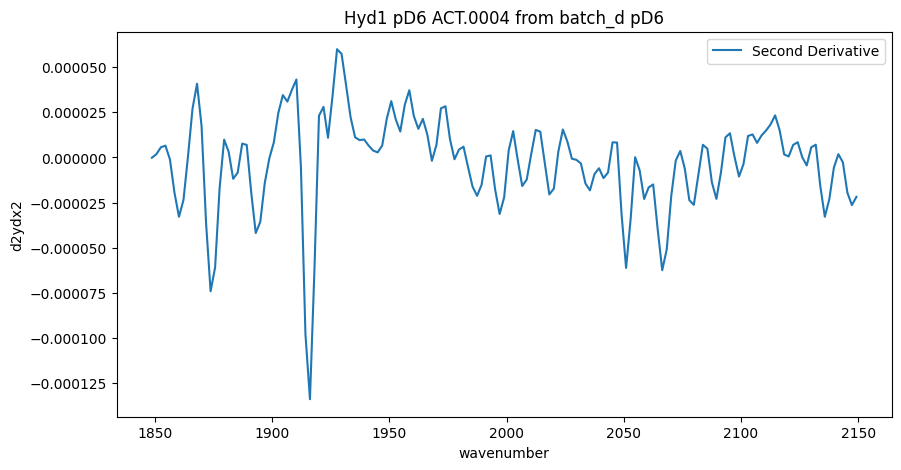

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0004/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0004/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0004/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0004/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0004/second_derivative_data.csv


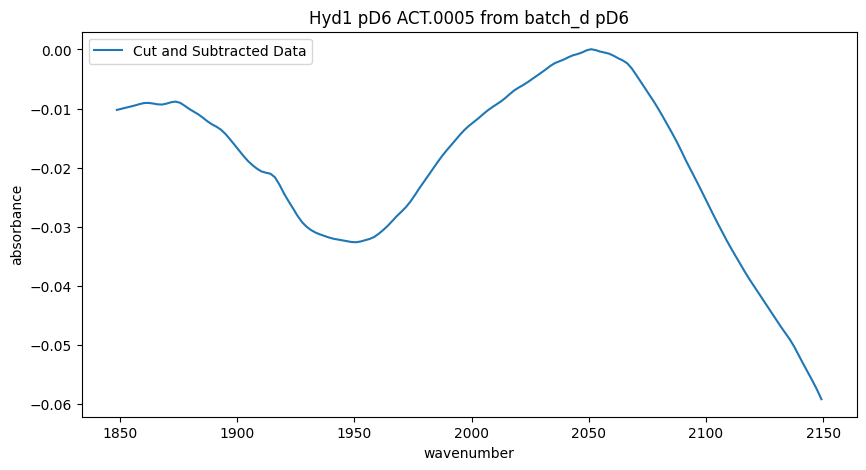

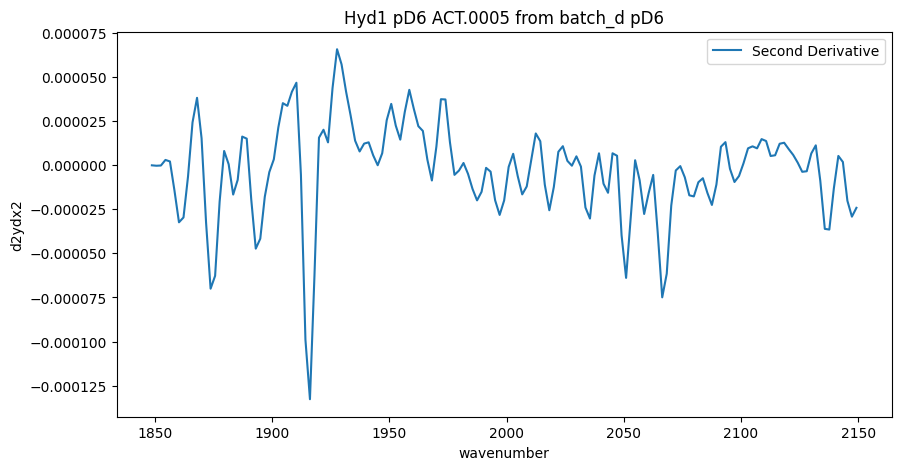

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0005/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0005/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0005/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0005/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0005/second_derivative_data.csv


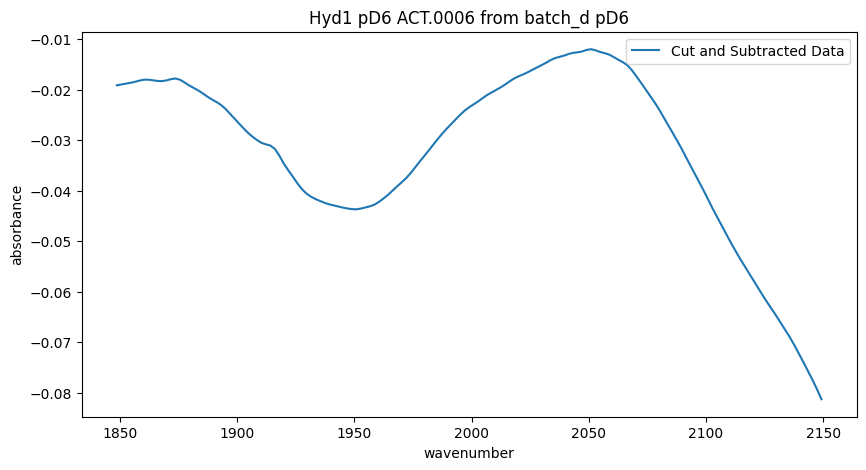

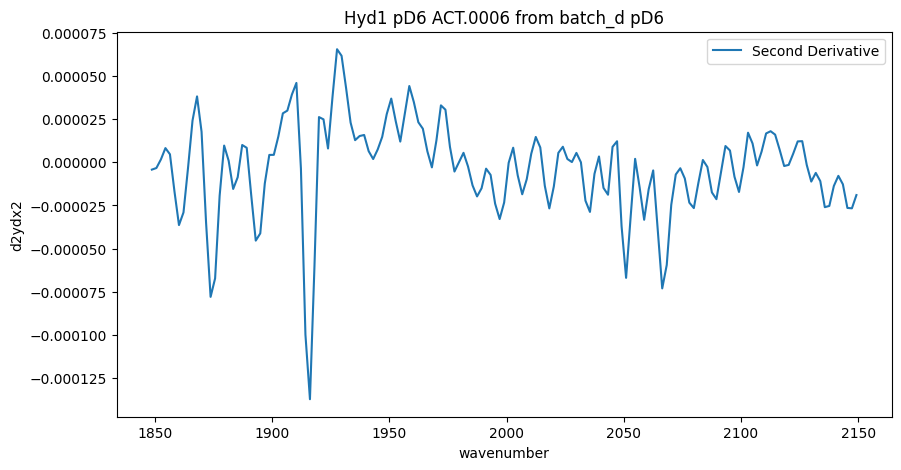

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0006/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0006/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0006/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0006/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0006/second_derivative_data.csv


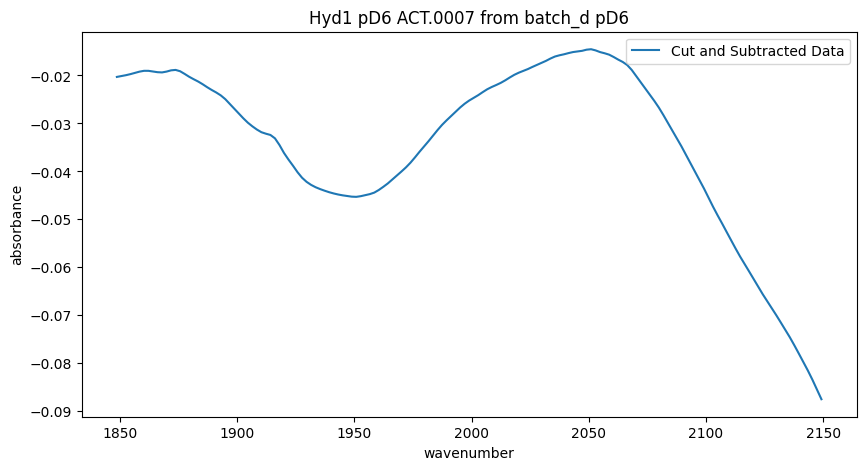

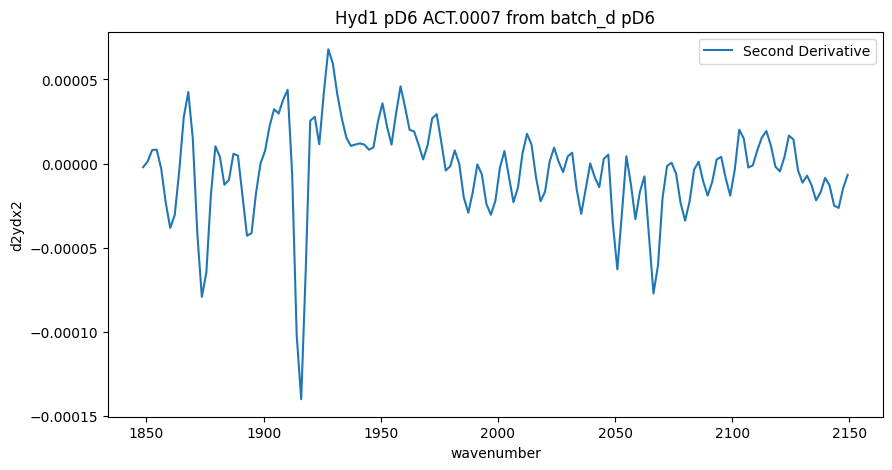

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0007/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0007/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0007/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0007/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0007/second_derivative_data.csv


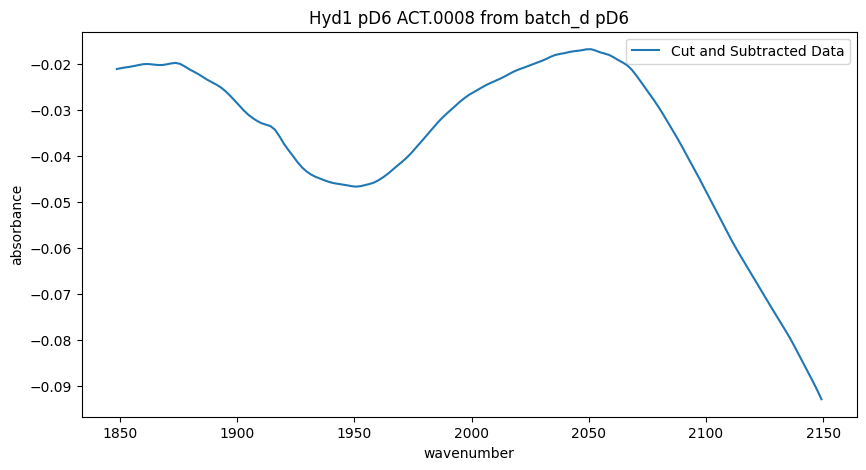

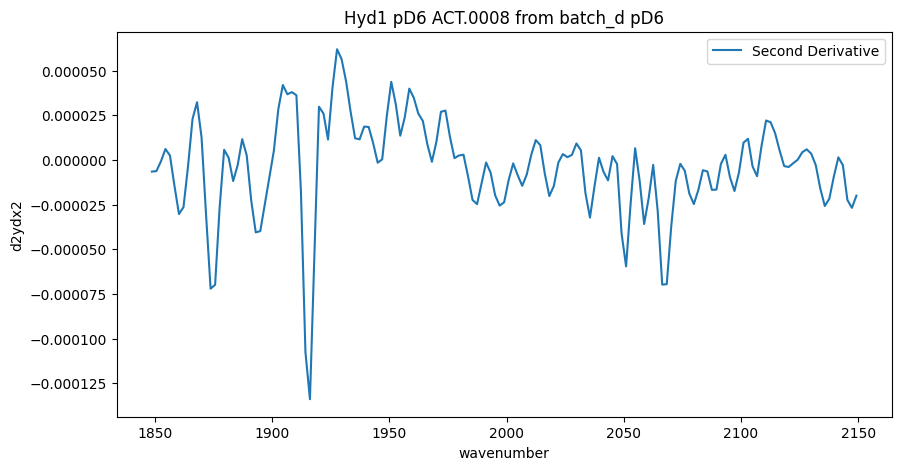

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0008/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0008/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0008/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0008/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0008/second_derivative_data.csv


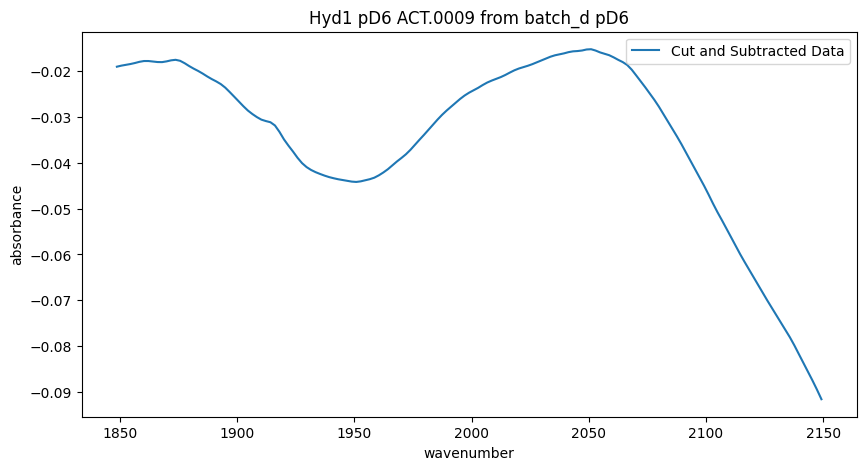

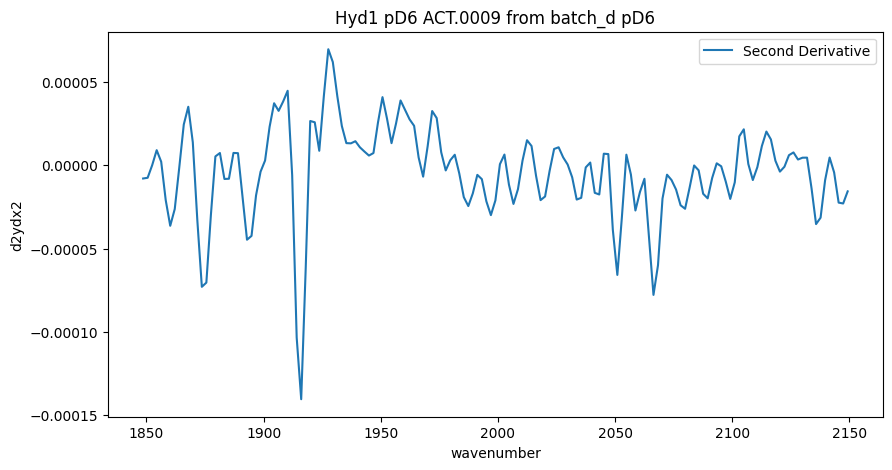

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0009/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0009/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0009/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0009/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0009/second_derivative_data.csv


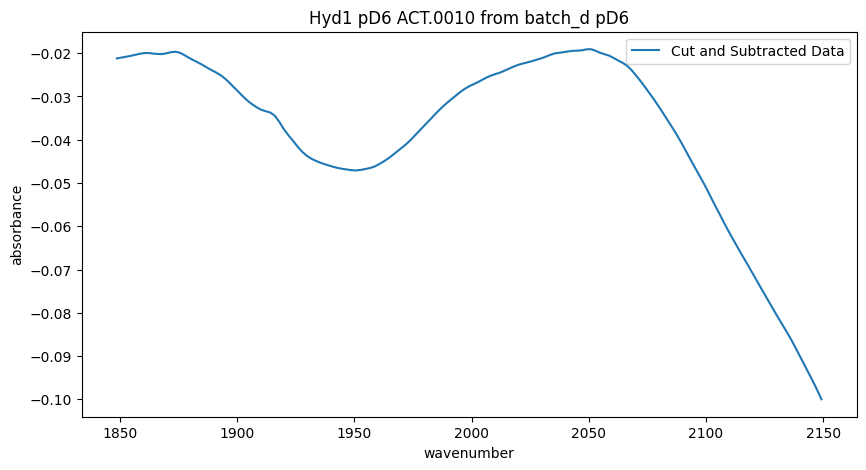

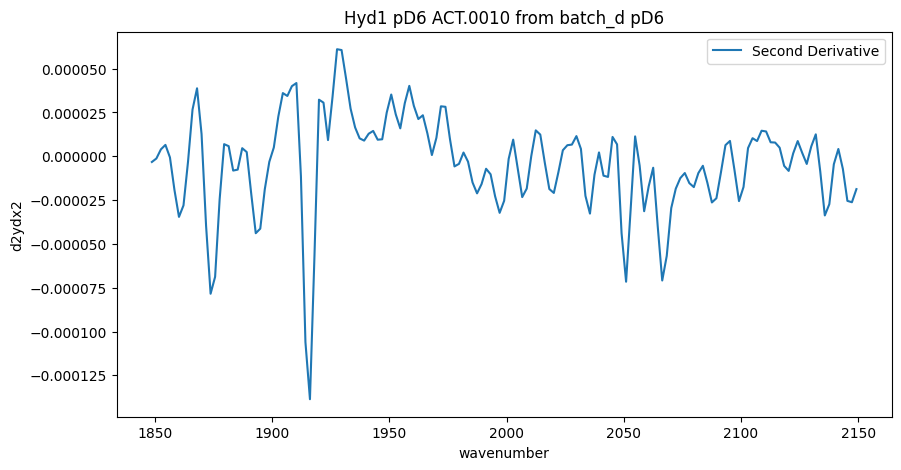

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0010/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0010/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0010/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0010/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0010/second_derivative_data.csv


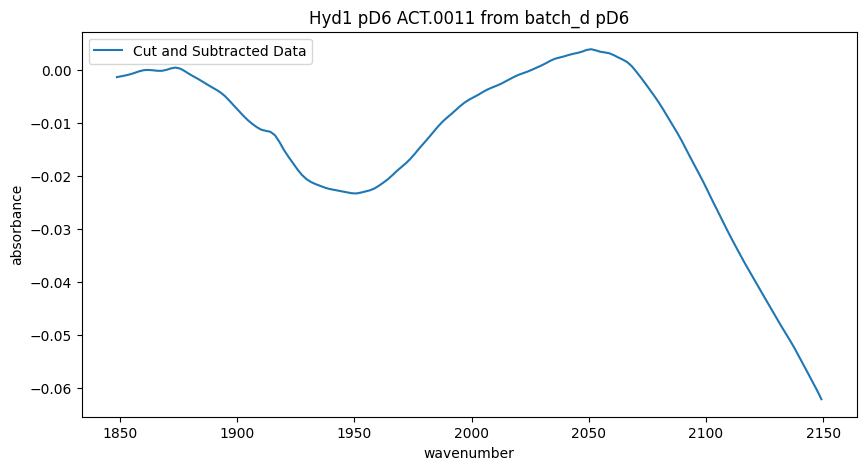

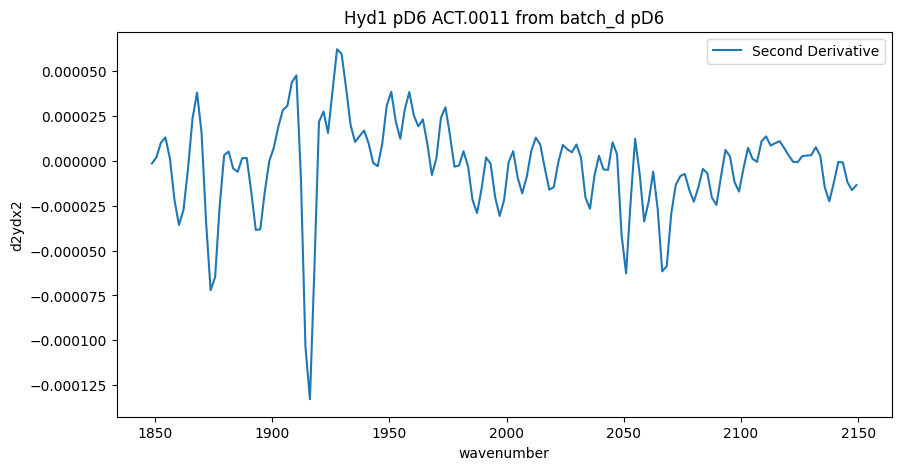

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0011/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0011/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0011/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0011/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0011/second_derivative_data.csv


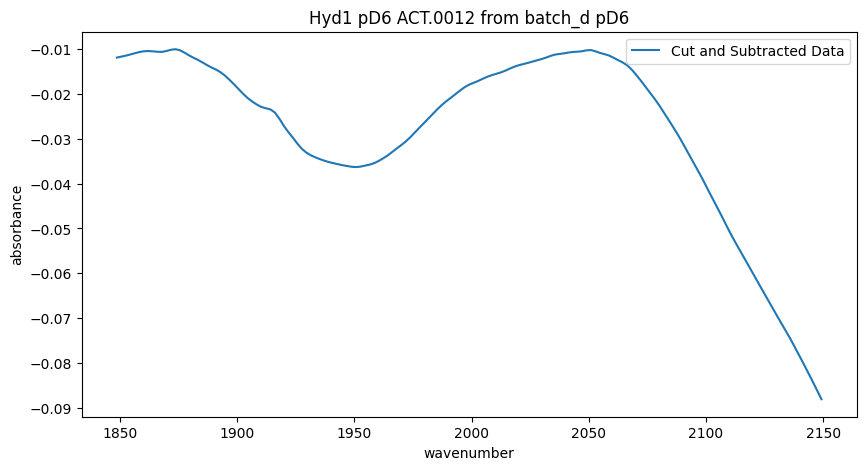

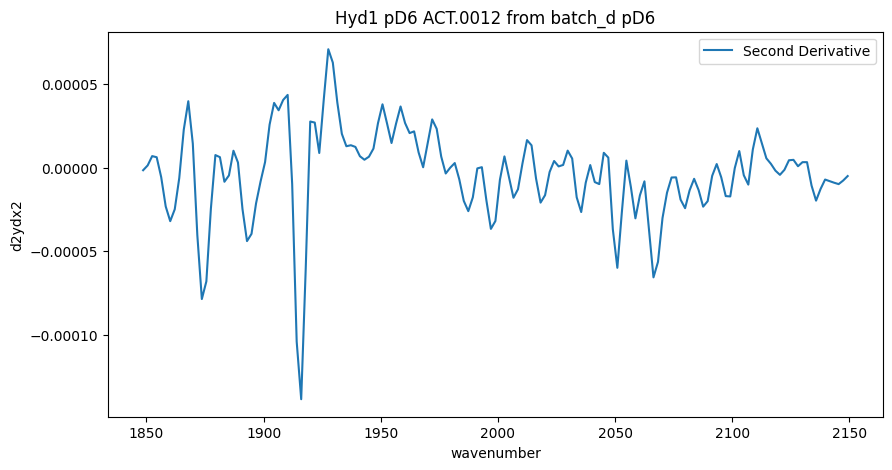

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0012/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0012/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0012/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0012/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0012/second_derivative_data.csv


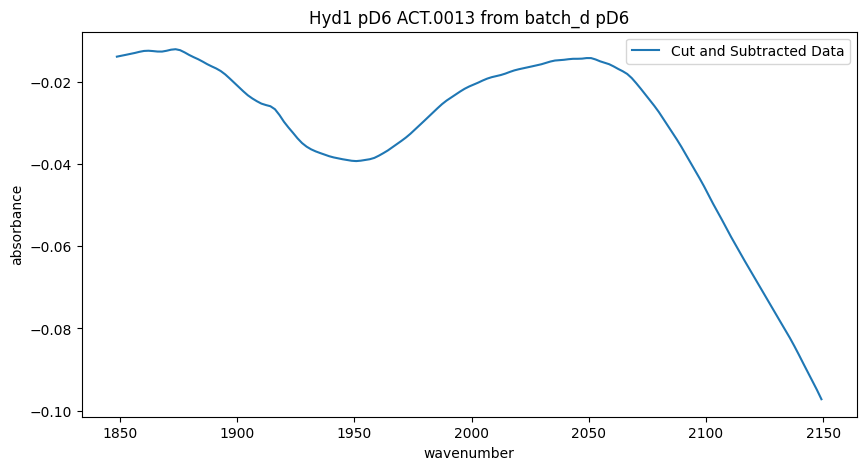

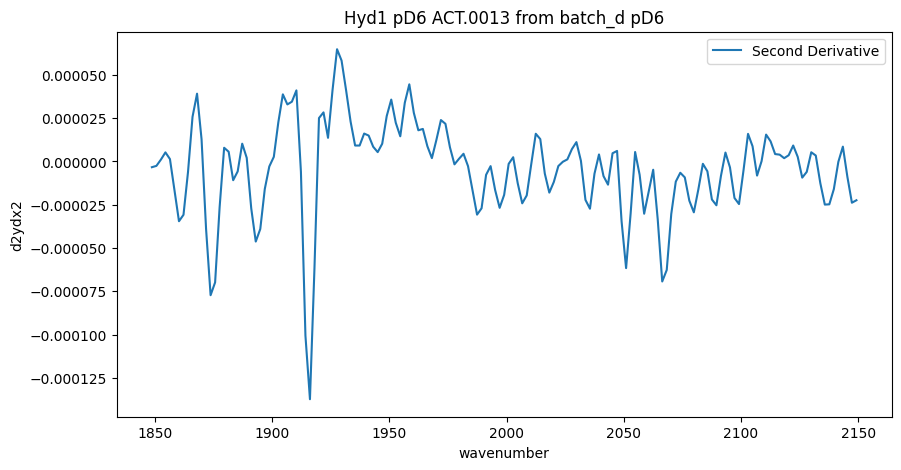

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0013/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0013/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0013/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0013/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0013/second_derivative_data.csv


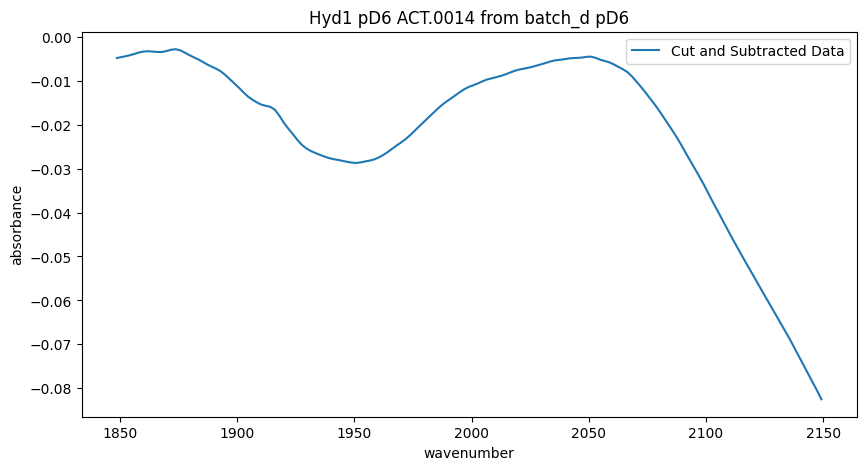

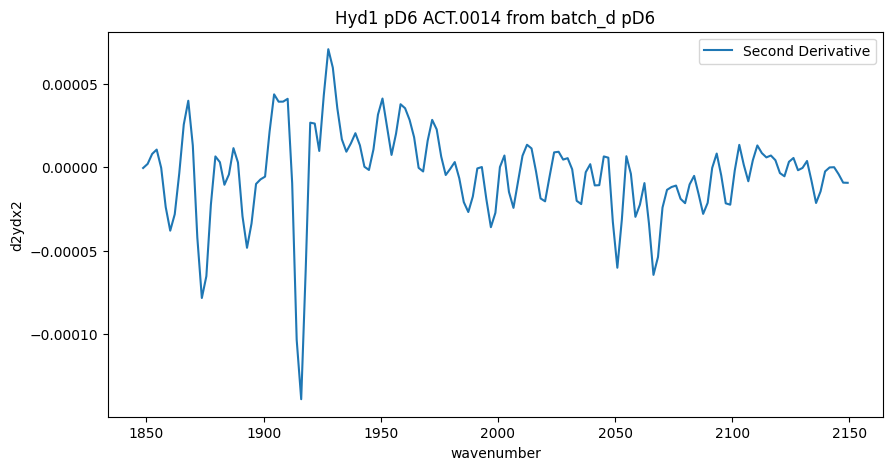

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0014/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0014/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0014/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0014/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0014/second_derivative_data.csv


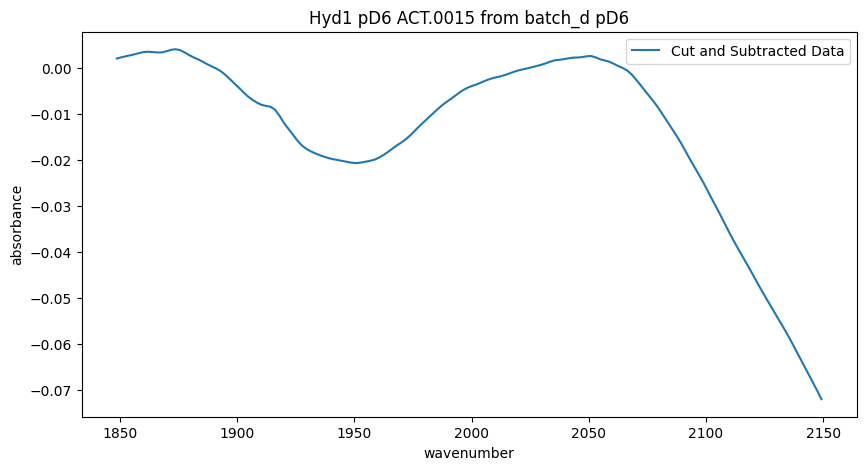

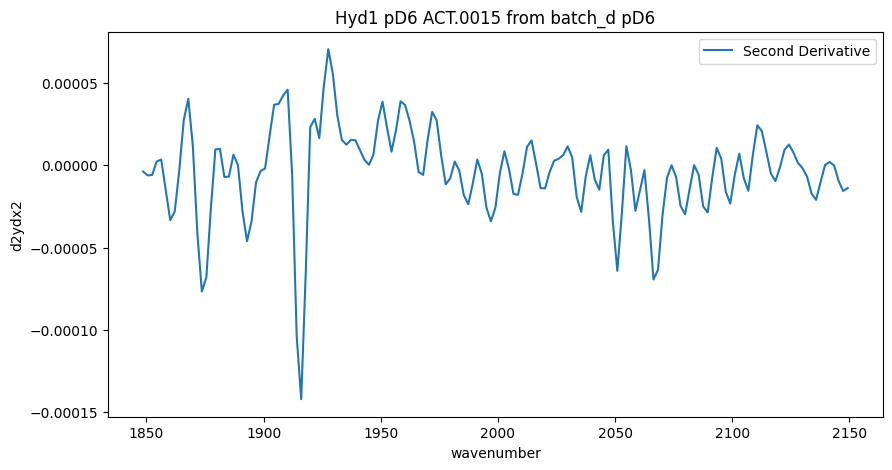

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0015/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0015/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0015/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0015/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0015/second_derivative_data.csv


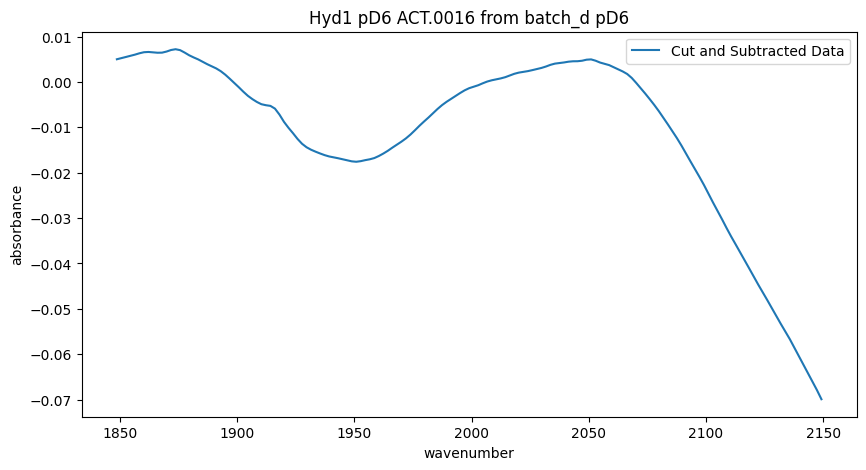

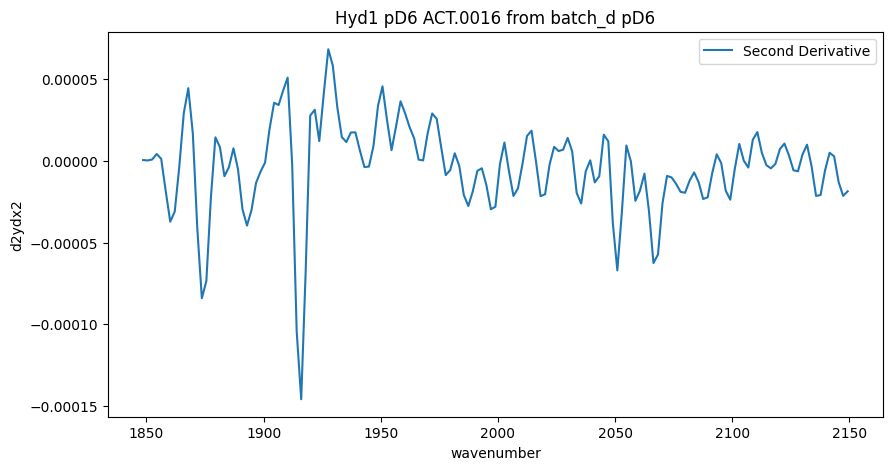

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0016/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0016/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0016/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0016/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0016/second_derivative_data.csv


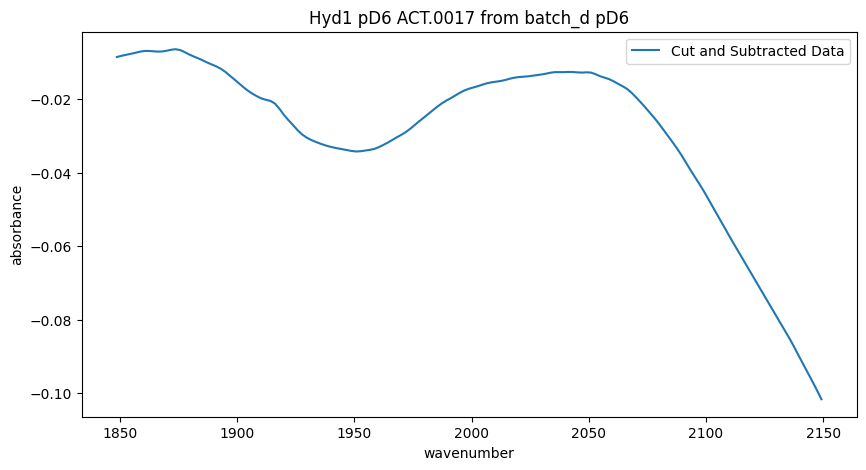

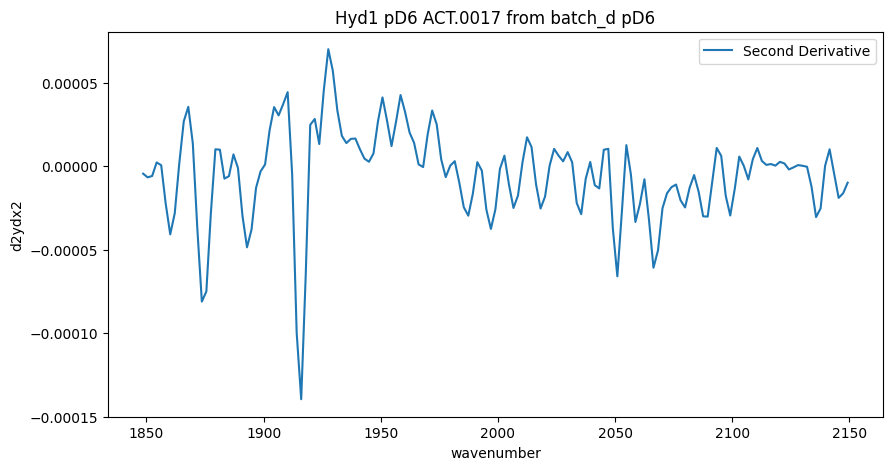

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0017/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0017/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0017/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0017/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0017/second_derivative_data.csv


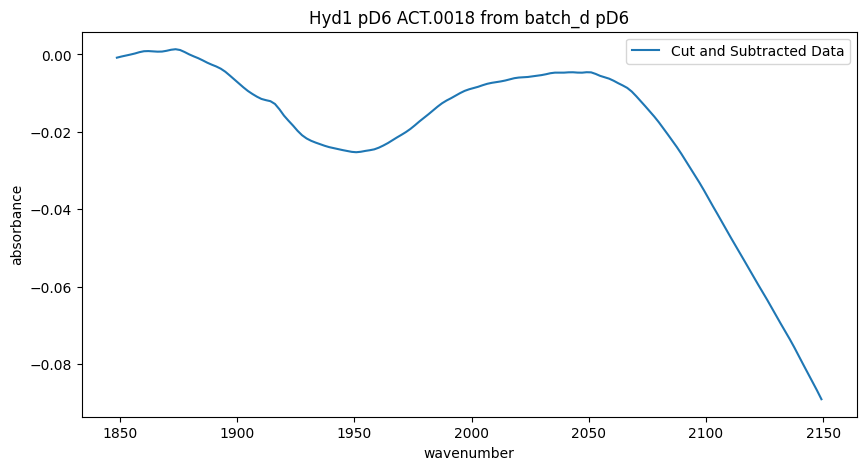

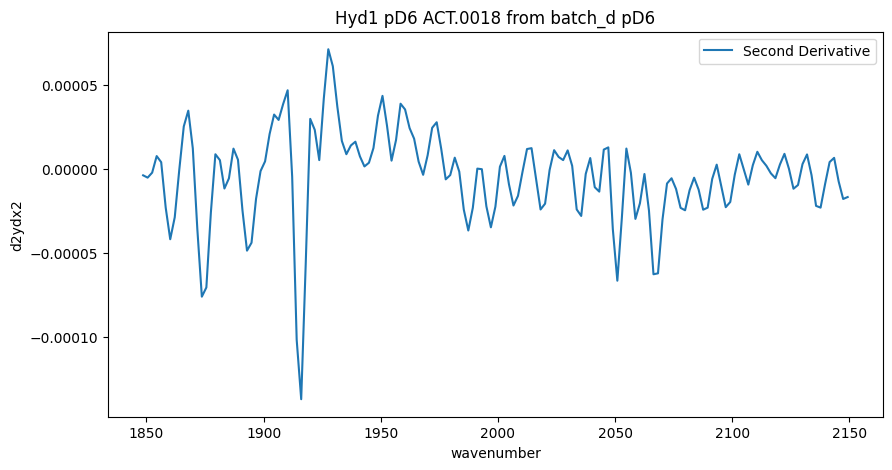

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0018/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0018/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0018/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0018/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0018/second_derivative_data.csv


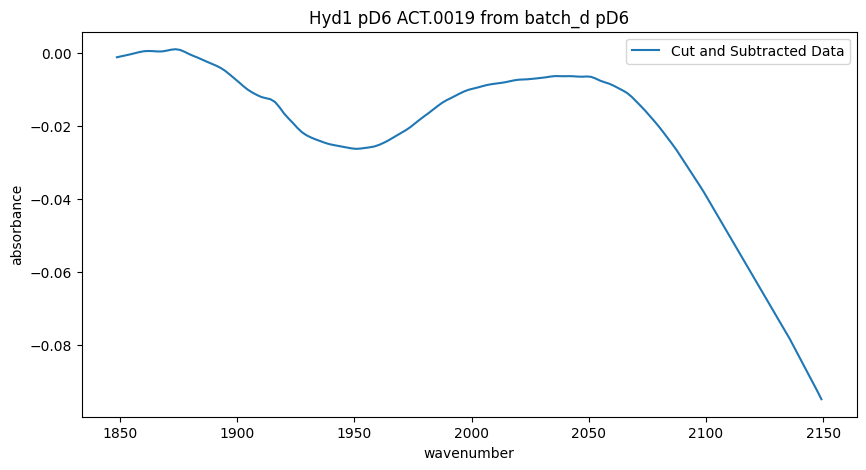

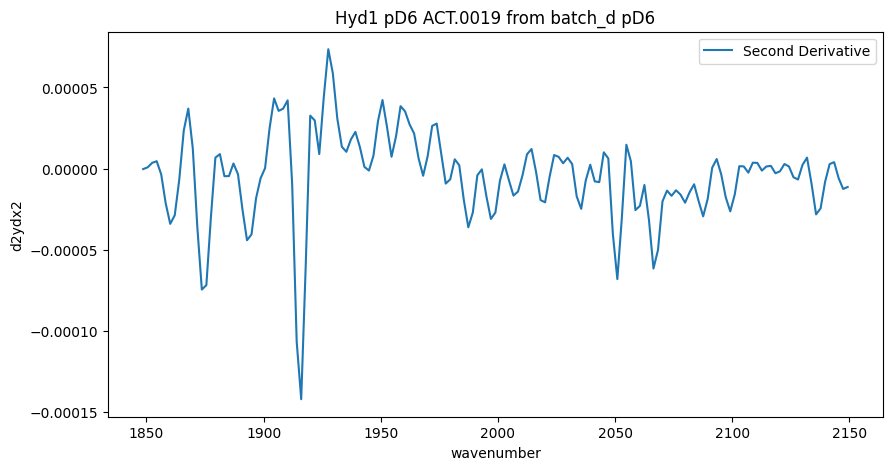

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0019/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0019/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0019/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0019/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0019/second_derivative_data.csv


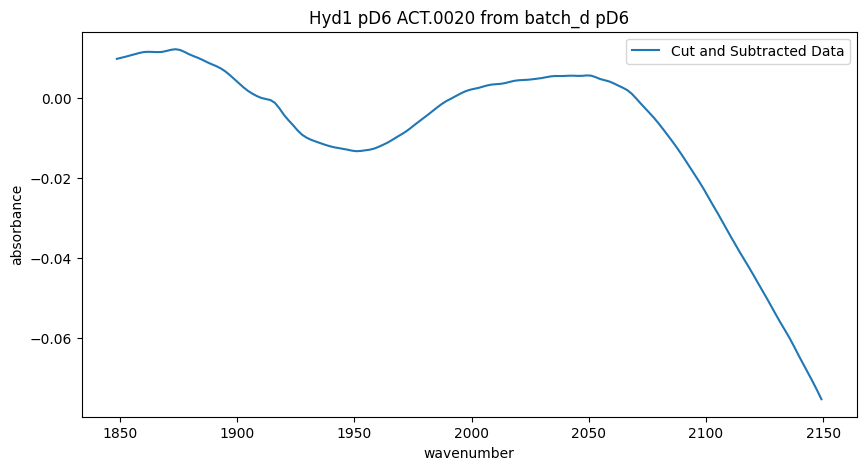

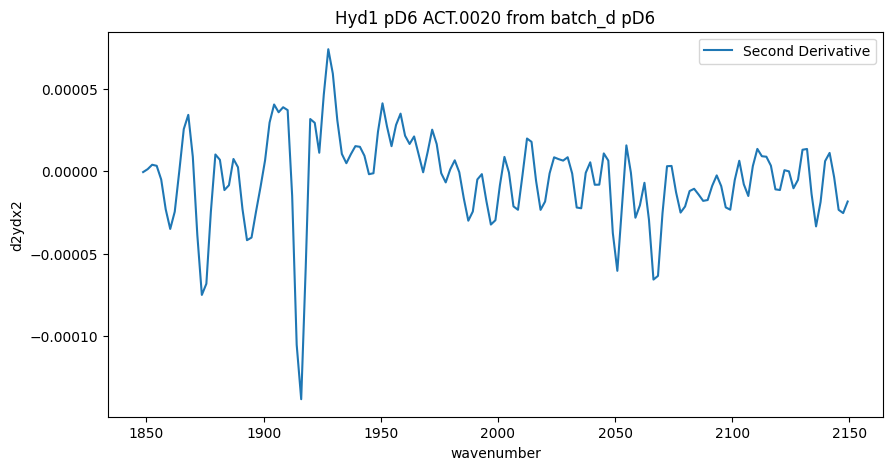

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0020/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0020/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0020/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0020/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0020/second_derivative_data.csv


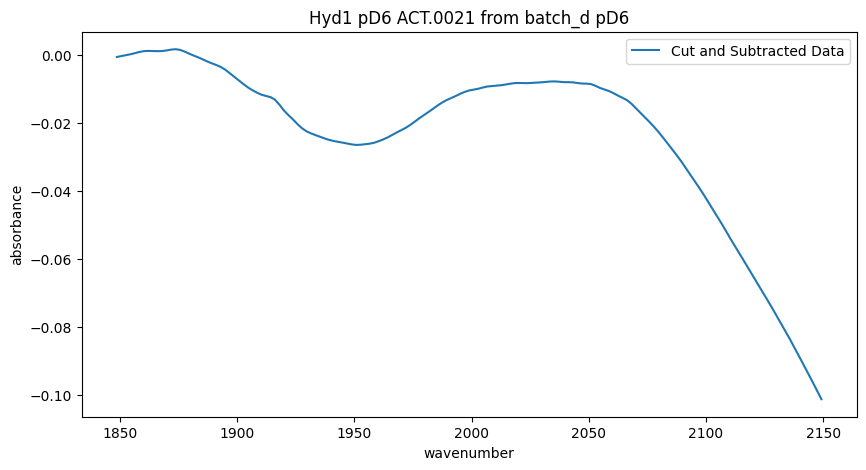

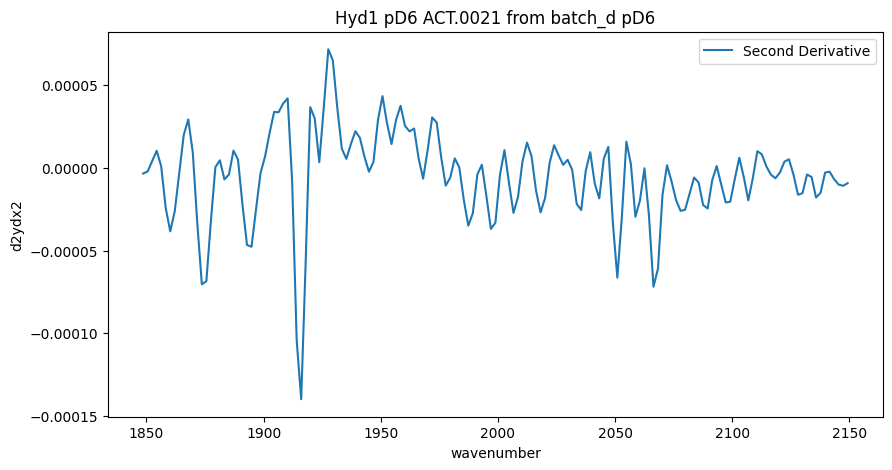

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0021/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0021/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0021/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0021/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0021/second_derivative_data.csv


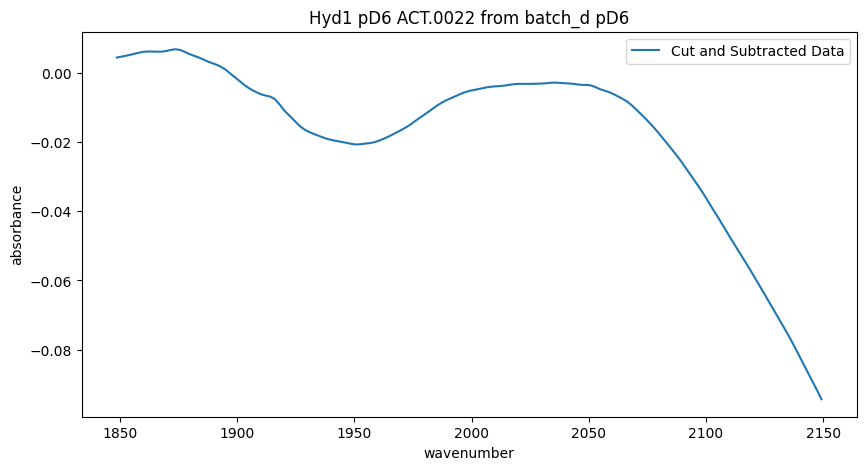

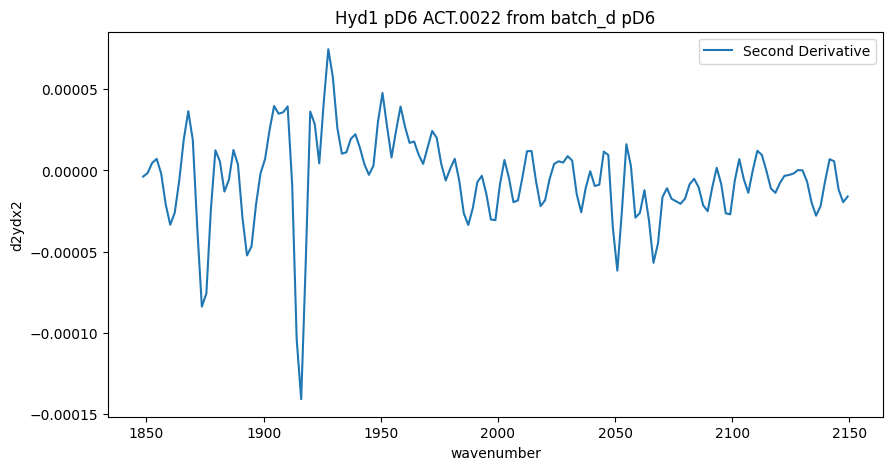

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0022/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0022/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0022/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0022/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0022/second_derivative_data.csv


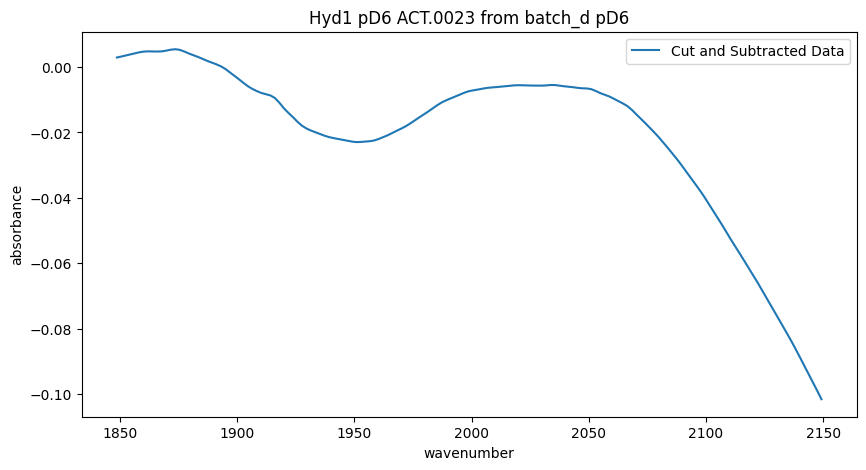

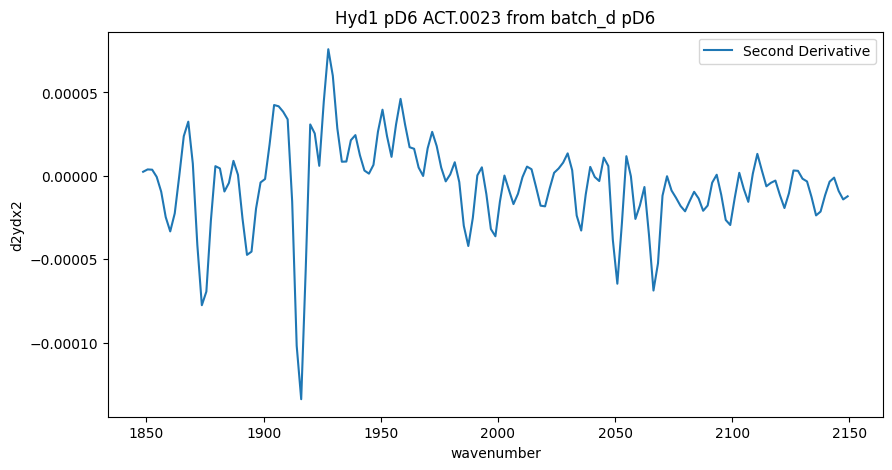

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0023/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0023/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0023/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0023/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0023/second_derivative_data.csv


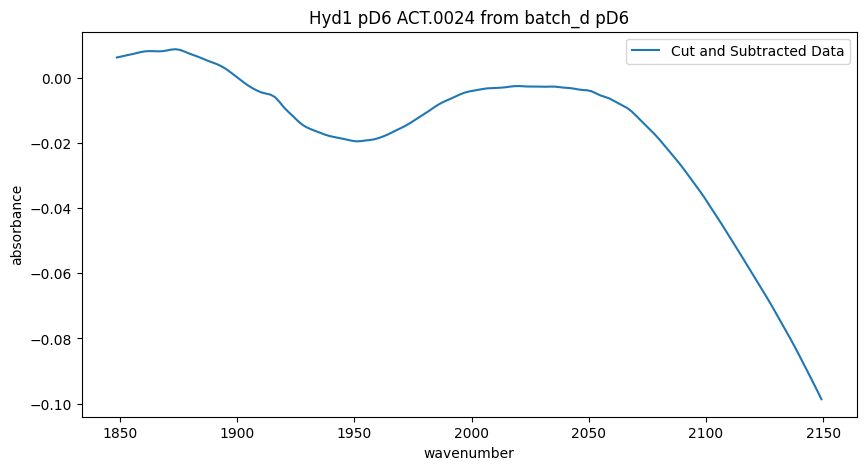

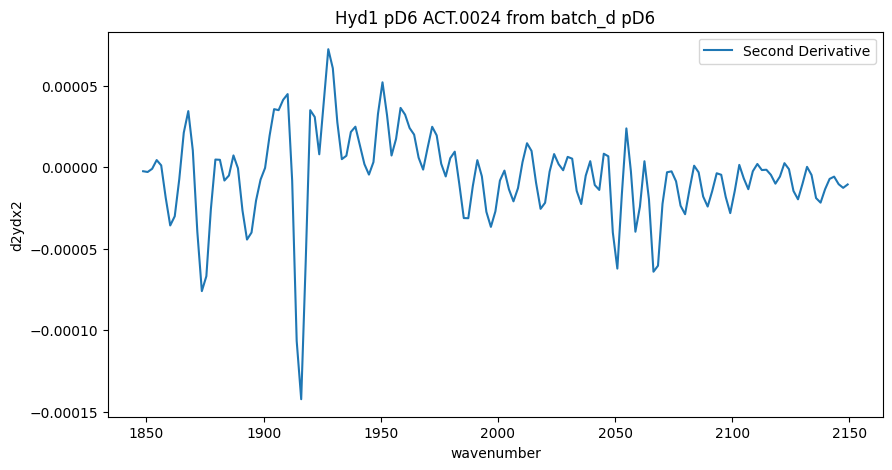

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0024/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0024/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0024/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0024/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0024/second_derivative_data.csv


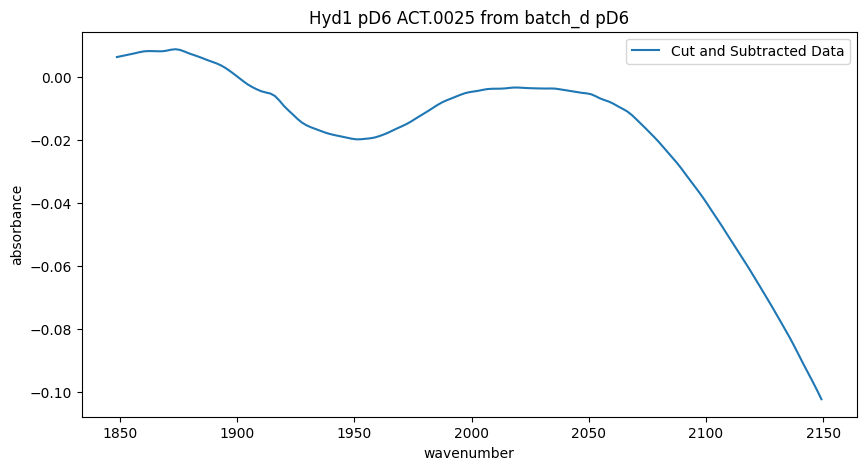

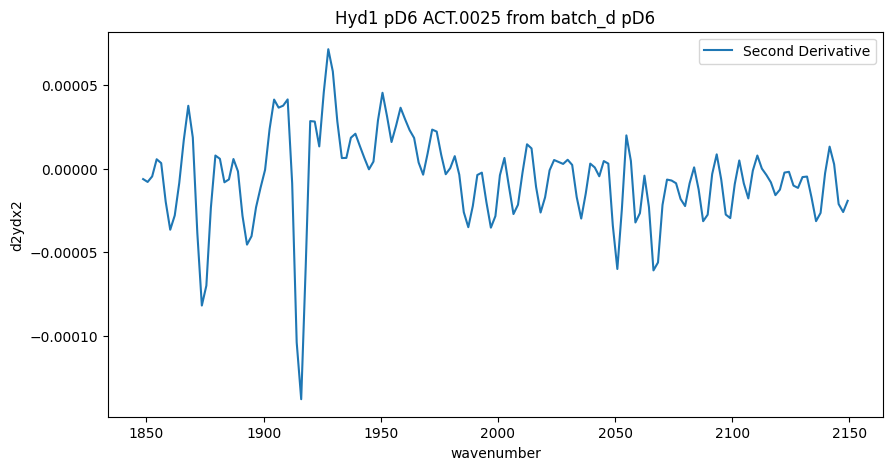

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0025/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0025/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0025/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0025/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 ACT.0025/second_derivative_data.csv


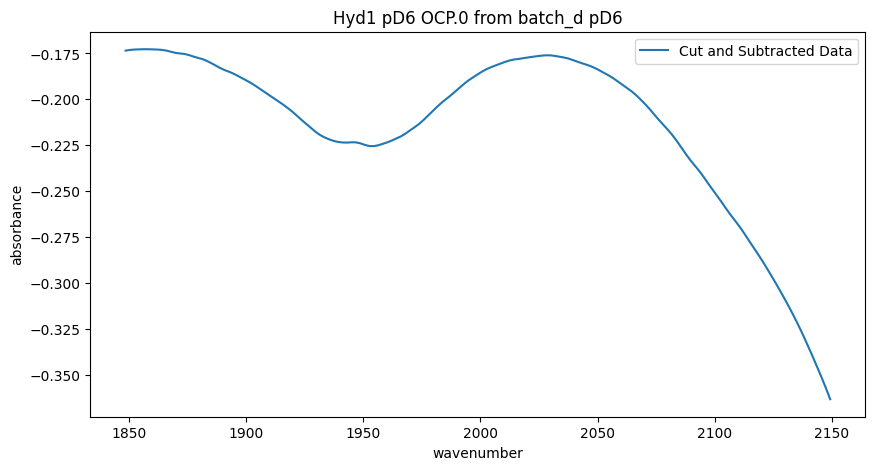

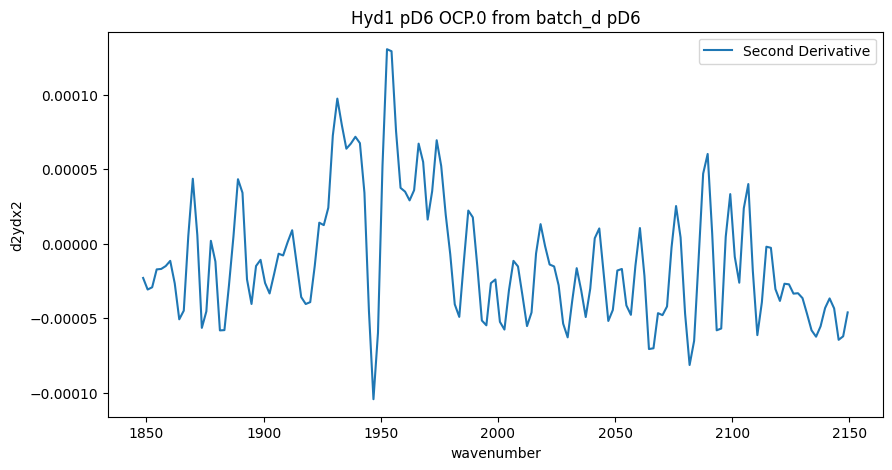

Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 OCP.0/subtracted_spectra
subtracted_spectra plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 OCP.0/subtracted_spectra
Plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 OCP.0/second_derivative_fig
second derivative plot saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 OCP.0/second_derivative_fig
Second derivative csv data saved to /Users/anuram/Documents/output_ftir3_test_21072024/pD6/Hyd1 pD6 OCP.0/second_derivative_data.csv


In [35]:
second_deriv_prospecpy_objects(pD6_raw_data, show_plots=True)

In [ ]:
print(pD6_raw_data[0].get_second_deriv_dict())

# Baseline correction and cruve fit for an example spectra workflow:

## Using a user interface please select the appropriate number of peaks using the threshold variable and number of anchor points using adjustment factor variable

In [ ]:
#anchor_point_dict, deriv_x_peak_val, anchor_points_raw_data, y_corr_abs
anchor_point_dict, deriv_x_peak_val, anchor_points_raw_data, y_corr_abs = interact(sample_second_deriv, sample_raw, 0.4, 1.8)

## Fit baseline spline through these anchor points to be used for baseline correction of raw spectra

In [ ]:
baseline_curve = baseline_spline(anchor_point_dict, smooth=10**-9)
peak_wv, peak_abs = get_peaks_absorbance(deriv_x_peak_val, anchor_points_raw_data, y_corr_abs)

plt.plot(anchor_points_raw_data, y_corr_abs, label = 'raw data')
plt.plot(baseline_curve['wavenumber'], baseline_curve['absorbance'], 'r-', label = 'baseline spline')
plt.plot(peak_wv, peak_abs, 'go', label = 'peaks')
plt.ylabel('Absorbance')
plt.xlabel('wavenumber')
plt.legend()

## Subtract the baseline spline from the raw data and plot the results

In [ ]:
baseline_corrected_abs = baseline_correction(baseline_curve, anchor_points_raw_data, y_corr_abs)
peak_wv_index, peak_wv_baseline, peak_baseline_abs = get_baseline_peak_index(baseline_corrected_abs, anchor_points_raw_data, peak_wv)


# Get peak widths at half peak height

In [ ]:
peakwidth_at_half_height = get_peak_wid_at_half_height(baseline_corrected_abs, peak_wv_index)
print(peakwidth_at_half_height)

# Fitting gaussian and lorentizian curves on the baseline corrected data

In [ ]:
params, rmse = peak_fit('Gaussian', anchor_points_raw_data, baseline_corrected_abs, peak_wv_index)
print(f'Root mean squared error is {rmse}')

In [ ]:
params, rmse = peak_fit('Lorentzian', anchor_points_raw_data, baseline_corrected_abs, peak_wv_index)
print(f'Root mean squared error is {rmse}')